/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_89976/2077795567.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,12_ema,27_ema,MACD,Signal,MACD_HIST
Date,,,,,,,,,,
2021-11-01,434.918671,435.542634,433.179151,435.164453,48433600,434.918671,434.918671,0.000000,0.000000,0.000000
2021-11-02,436.677032,436.989028,434.956410,435.088779,48908400,435.871117,435.830414,0.040703,0.022613,0.018090
2021-11-03,439.343140,439.749652,435.665546,436.109882,52509800,437.226248,437.089087,0.137161,0.069559,0.067602
2021-11-04,441.413513,441.498595,439.598346,439.948137,52847100,438.548004,438.293169,0.254835,0.132322,0.122513
2021-11-05,442.945068,444.949297,441.422999,443.654113,66390600,439.742671,439.366287,0.376384,0.204925,0.171459
...,...,...,...,...,...,...,...,...,...,...
2025-10-20,671.299988,672.210022,667.270020,667.320007,60493400,665.176515,661.731410,3.445105,4.367217,-0.922111
2025-10-21,671.289978,672.989990,669.979980,671.440002,56249000,666.117048,662.414165,3.702883,4.234350,-0.531467
2025-10-22,667.799988,672.000000,663.299988,672.000000,80564000,666.375962,662.798866,3.577095,4.102899,-0.525804


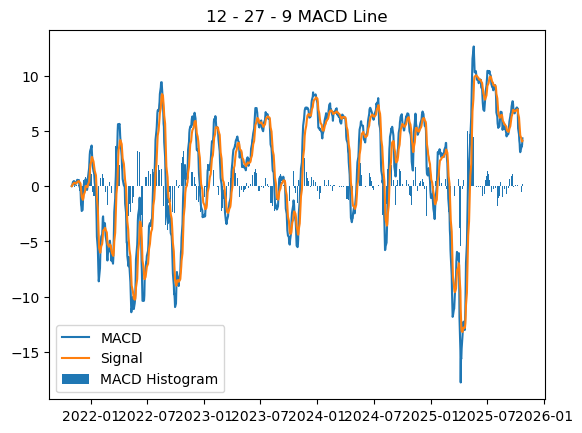

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# MACD Indicator is used to explain Trends. 
# Bullish Momentum: when the signal line crosses above the MACD Line
# Bearish Momentum: when the signal line crosses below the MACD Line

TICKER = "SPY"
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9 # Difference between those two values 
LOOKBACK = 1000

def get_data(ticker = TICKER):
    df = yf.download(ticker, start="1993-04-01")
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:,:]

def add_MACD(df, fast = MACD_FAST, slow = MACD_SLOW, span = MACD_SPAN):
    # we will be using EMA (Exponential Moving Average from now on, because they are more exact)
    # Step 1: Create Fast and Slow EMA Columns
    df[f"{fast}_ema"] = df["Close"].ewm(span = fast).mean()
    df[f"{slow}_ema"] = df["Close"].ewm(span = slow).mean()

    # Step 2: Create MACD Column (Macd line is the difference between the fast and the slow)
    df[f"MACD"] = df[f"{fast}_ema"] - df[f"{slow}_ema"]

    # Step 3: Create MACD Signal Column (Span here = 9-period) == moving average of this line
    df["Signal"] = df[f"MACD"].ewm(span=span).mean()

    # Step 4: MACD Hist is almost always what is used fin TA
    df["MACD_HIST"] = df[f"MACD"] - df[f"Signal"]

    # Step 5: Plot Functions
    plt.plot(df["MACD"]) # Blue
    plt.plot(df["Signal"]) # Orange
    # When MACD (Blue Line) crosses above the Signal (Orange line) == Upwards momentum (Long)
    # When MACD (Blue Line) crosses below the Signal (Orange line) == Downwards momentum (Short)
    # Histogram Strategy (Crossover == Signal to Enter) - Plot a bar Chart:
    plt.bar(x=df.index, height=df["MACD_HIST"])
    # "For every Date in my index, draw a bar equal to that day's Histogram Value 
    # Direction: is the bar positive (above 0 - Bullish) or negative (below 0 - Bearish)?
    # Strength: is the bar tall (strong momentum) or short (weak momentum)?

    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD", "Signal", "MACD Histogram"])

    return df

def strategy(df):

## Visualizing the Data Set
def main():
    df = get_data()
    df = add_MACD(df)

    return df

main()

Text(0.5, 1.0, '12 - 27 - 9 MACD Line')

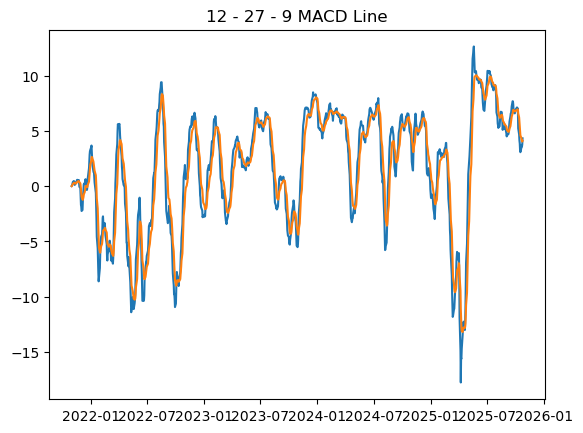

In [27]:
plt.plot(df["MACD"]) # Blue
plt.plot(df["Signal"]) # Orange

# Histogram Strategy:
# When the blue line crosses above the orange line, that signalizes upwards moemntum 
# And when the blue line crosses below the orange line, that is downwards moemntum 
# A Crossover is usually a signal to enter

plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")

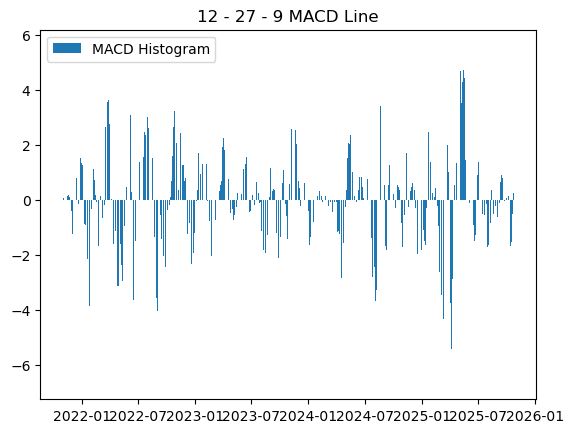

In [28]:
    plt.bar(x=df.index, height=df["MACD_HIST"])
    # "For every Date in my index, draw a bar equal to that day's Histogram Value 
    # Direction: is the bar positive (above 0 - Bullish) or negative (below 0 - Bearish)?
    # Strength: is the bar tall (strong momentum) or short (weak momentum)?

    plt.title(f"{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Line")
    plt.legend(["MACD Histogram"])